In [54]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [55]:
model_type = 'FullyConnected'
dataset_type = 'MNISTDataModule'

torch.Size([10, 784])


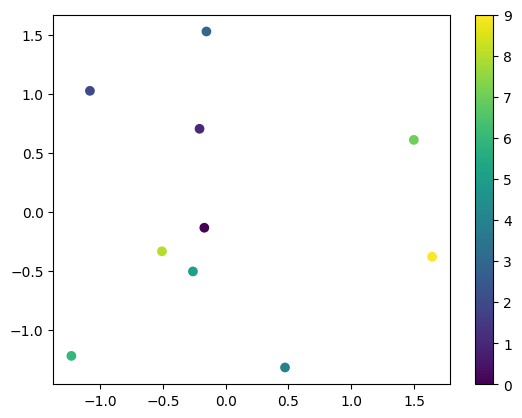

torch.Size([10, 784])


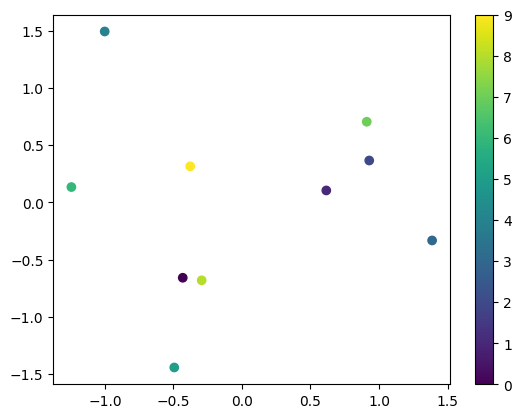

torch.Size([10, 784])


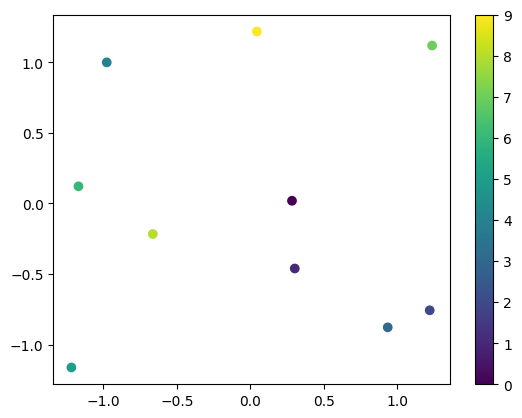

torch.Size([10, 784])


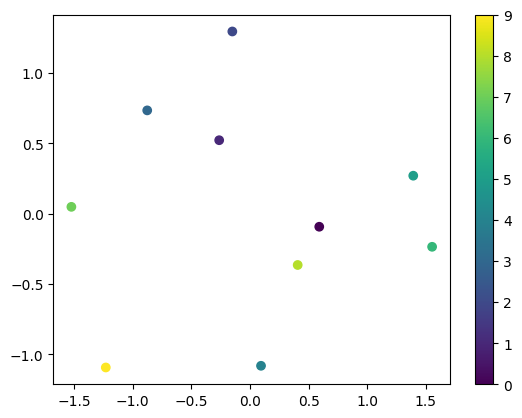

torch.Size([10, 784])


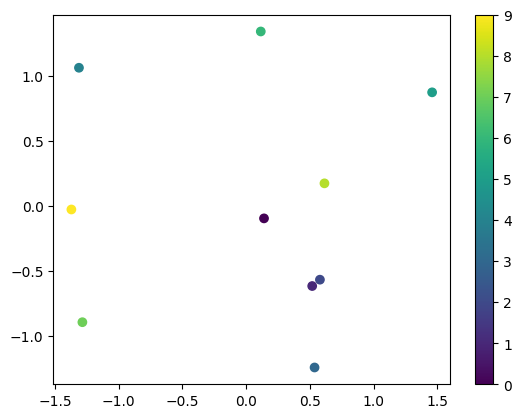

torch.Size([10, 784])


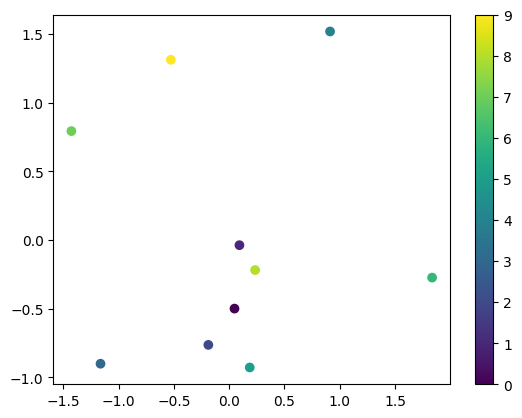

torch.Size([10, 784])


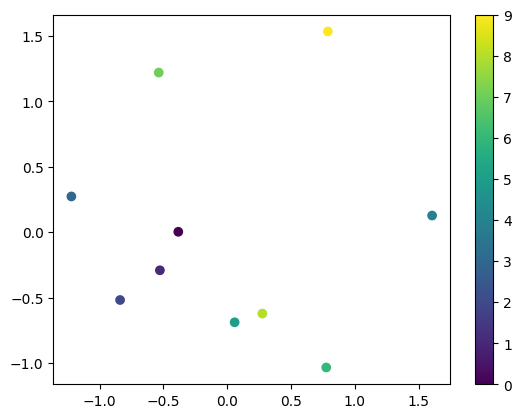

torch.Size([10, 784])


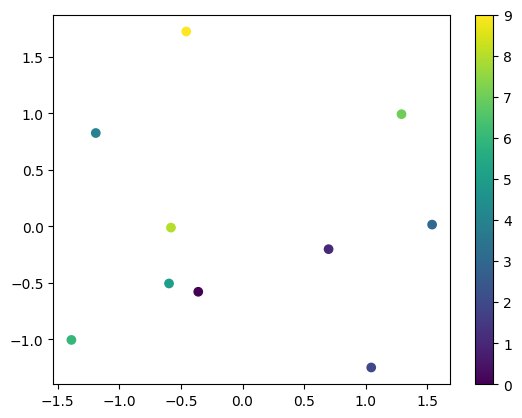

torch.Size([10, 784])


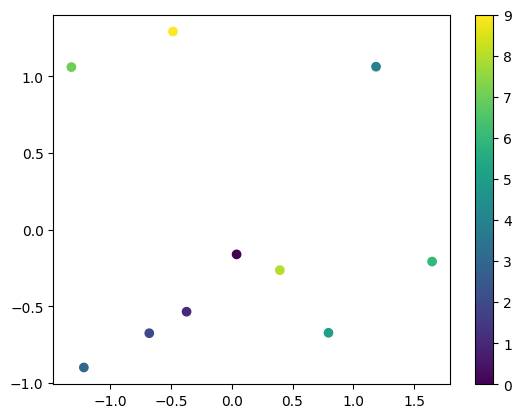

torch.Size([10, 784])


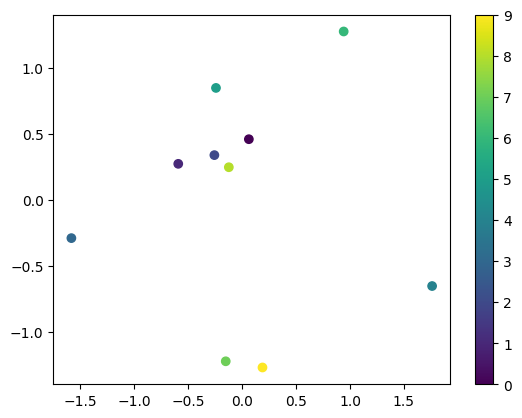

In [94]:
weight_matrices = []
for seed in range(10):
    model = torch.load(f'saved_models/{model_type}-{dataset_type}/seed-{seed}')
    weights = model['layers.2.weight'] @ model['layers.1.weight'] @ model['layers.0.weight']

    print(weights.shape)
    # reduce dimensionality of weights
    pca = PCA(n_components=2)
    weights_reduced = pca.fit_transform(weights)
    num_displayed_dots = 10
    plt.scatter(weights_reduced[:num_displayed_dots,0], weights_reduced[:num_displayed_dots,1], label=f'seed-{seed}', c=range(num_displayed_dots))
    plt.colorbar()
    plt.show()


In [108]:
max_distance_indices = []
for seed in range(100):
    model = torch.load(f'saved_models/{model_type}-{dataset_type}/seed-{seed}')
    weights = model['layers.2.weight'] 

    centroid = weights.mean(axis=0)
    dist_from_centroid = torch.norm(weights - centroid, dim=1)
    max_distance_indices.append(np.argmin(dist_from_centroid.cpu().numpy()))

(array([17.,  7., 11., 27.,  3.,  1.,  2.,  1., 31.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

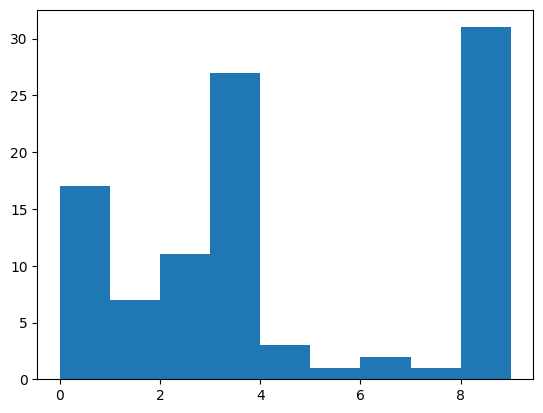

In [109]:
plt.hist(max_distance_indices, bins=max(max_distance_indices))

In [83]:
model['layers.2.weight'].shape

torch.Size([10, 50])